In [1]:
# CartPole Random
'''
In CartPole's environment, there are four observations at any given state, representing information such as 
the angle of the pole and the position of the cart.
Using these observations, the agent needs to decide on one of two possible actions: move the cart left or right.
'''
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
parameters = np.random.rand(4)*2 -1
env = gym.make('CartPole-v0')
observation = env.reset()
print(parameters, observation, np.matmul(parameters, observation))


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[ 0.56101781 -0.74653255 -0.55697623 -0.18755559] [ 0.00737946  0.00674821 -0.04078107  0.01421795] 0.019149686051073277


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/pgunatilake/anaconda3/envs/findspark-jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


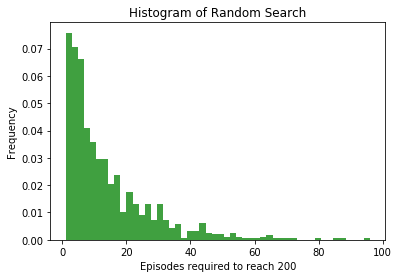

13.637


In [3]:
def run_episode(env, parameters):
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        # Linear combination of parameters. observation
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

def train(submit):
    env = gym.make('CartPole-v0')
    
    if submit:
        env.monitor.start('cartpole-experiments/', force=True)
        
    gym.logger.set_level(40)

    counter = 0
    bestparams = None
    bestreward = 0
    for _ in range(10000):
        counter += 1
        # parameters are between [-1, 1]
        parameters = np.random.rand(4) * 2 - 1
        reward = run_episode(env,parameters)
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters
            if reward == 200:
                break

    if submit:
        for _ in range(100):
            run_episode(env,bestparams)
        env.monitor.close()

    return counter

# train an agent to submit to openai gym
# train(submit=True)

# create graphs
results = []
for _ in range(1000):
    results.append(train(submit=False))

plt.hist(results,50,normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Histogram of Random Search')
plt.show()

print(np.sum(results) / 1000.0)

In [14]:
def run_episode(env, parameters):
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        # Linear combination of parameters. observation
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
            
    return totalreward

def train_hill_climbing(env):
    noise_scaling = 0.1 
    parameters = np.random.rand(4) * 2 - 1  
    bestreward = 0 
    counter = 0
    for _ in range(10000):  
        counter += 1
        newparams = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
        reward = 0
        reward = run_episode(env,newparams)
        if reward > bestreward:
            bestreward = reward
            parameters = newparams
            if reward >= 200:
                break
                
    return counter, bestreward

0 10000 11.0
1 203 200.0
2 10000 11.0
3 10000 132.0
4 10000 11.0
5 14 200.0
6 10000 11.0
7 1 200.0
8 10000 11.0
9 173 200.0
10 5 200.0
11 154 200.0
12 10000 107.0
13 10000 187.0
14 10000 11.0
15 10000 11.0
16 407 200.0
17 10000 11.0
18 122 200.0
19 10000 150.0
20 10000 11.0
21 10000 11.0
22 10000 172.0
23 484 200.0
24 2136 200.0
25 10000 11.0
26 48 200.0
27 10000 11.0
28 10000 11.0
29 3365 200.0
30 264 200.0
31 10000 10.0
32 10000 11.0
33 23 200.0
34 10000 11.0
35 10000 11.0
36 2 200.0
37 27 200.0
38 23 200.0
39 1354 200.0
40 833 200.0
41 10000 11.0
42 17 200.0
43 73 200.0
44 83 200.0
45 1 200.0
46 10000 11.0
47 3 200.0
48 10000 11.0
49 1 200.0
50 5 200.0
51 10000 11.0
52 10000 10.0
53 10000 11.0
54 10000 11.0
55 10000 11.0
56 5 200.0
57 10000 11.0
58 10000 11.0
59 10000 11.0
60 2323 200.0
61 10000 11.0
62 3 200.0
63 1 200.0
64 395 200.0
65 413 200.0
66 10000 11.0
67 10000 11.0
68 10000 11.0
69 1 200.0
70 10000 11.0
71 10000 170.0
72 10000 10.0
73 202 200.0
74 10000 11.0
75 10000 171.0

588 10000 10.0
589 10000 11.0
590 4 200.0
591 10000 11.0
592 10000 11.0
593 10000 11.0
594 10000 11.0
595 10000 11.0
596 4 200.0
597 6 200.0
598 10000 11.0
599 12 200.0
600 10000 11.0
601 356 200.0
602 10000 11.0
603 10000 11.0
604 6 200.0
605 5940 200.0
606 1 200.0
607 10000 11.0
608 1047 200.0
609 10000 11.0
610 2 200.0
611 41 200.0
612 11 200.0
613 2 200.0
614 69 200.0
615 10000 11.0
616 10000 11.0
617 10000 116.0
618 10000 11.0
619 1830 200.0
620 1 200.0
621 527 200.0
622 3 200.0
623 756 200.0
624 1 200.0
625 22 200.0
626 10000 183.0
627 1 200.0
628 10000 160.0
629 288 200.0
630 77 200.0
631 10000 11.0
632 10000 11.0
633 10000 104.0
634 10000 85.0
635 334 200.0
636 1 200.0
637 10000 11.0
638 1089 200.0
639 4 200.0
640 10000 11.0
641 10000 187.0
642 1 200.0
643 10000 11.0
644 129 200.0
645 10000 11.0
646 10000 171.0
647 10000 156.0
648 10000 11.0
649 10000 144.0
650 3 200.0
651 1 200.0
652 10000 11.0
653 10000 11.0
654 10000 11.0
655 1 200.0
656 10000 11.0
657 10000 11.0
658 1813 20

/Users/pgunatilake/anaconda3/envs/findspark-jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


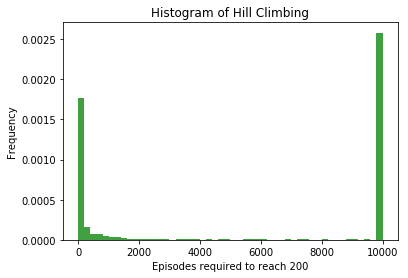

5414.163


In [15]:
# create graphs
results = []
env = gym.make('CartPole-v0')
gym.logger.set_level(40)

for i in range(1000):
    val, bestreward = train_hill_climbing(env) 
    print(i, val, bestreward)
    results.append(val)

plt.hist(results,50,normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Histogram of Hill Climbing')
plt.show()

print(np.sum(results) / 1000.0)